In [3]:
# Upload your Airbnb dataset (example: AB_NYC_2019.csv)
from google.colab import files
uploaded = files.upload()


Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx


Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (2).xlsx
Different room types: ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']

Number of listings per neighbourhood group:
 neighbourhood_group
Brooklyn         34621
Manhattan        34560
Queens           11124
Bronx             2267
Staten Island      816
brookln              1
Name: count, dtype: int64


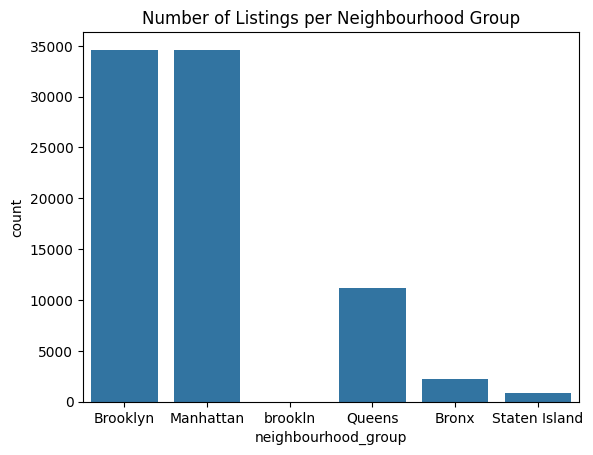


Average price per neighbourhood group:
 neighbourhood_group
Queens           630.502517
Bronx            630.201147
Brooklyn         627.435632
Manhattan        623.435561
Staten Island    622.132353
brookln          580.000000
Name: price_$, dtype: float64


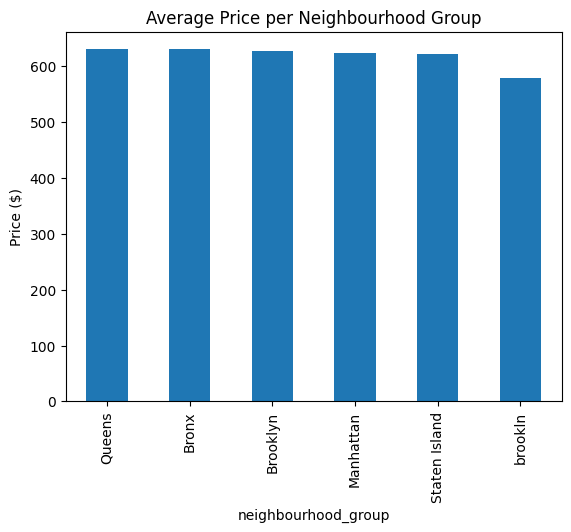

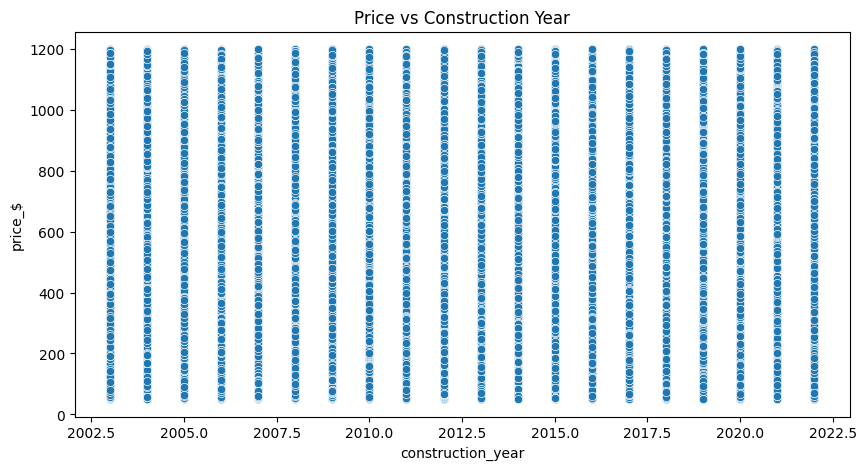


Top 10 hosts by listing count:
 host_name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated_host_listings_count, dtype: float64


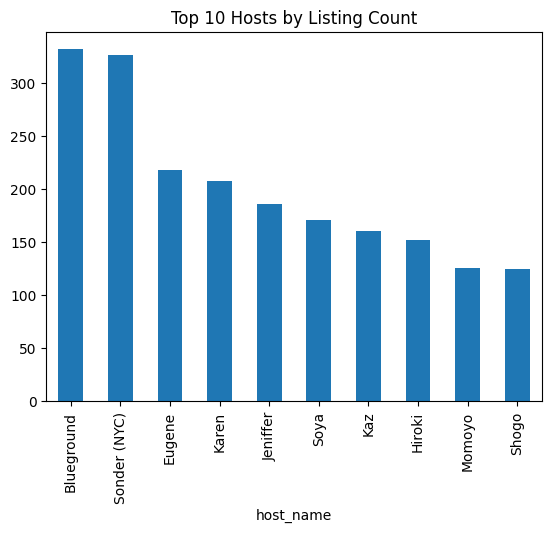


Average review rate by identity verification:
 host_identity_verified
unconfirmed    3.273325
verified       3.284066
Name: review_rate_number, dtype: float64


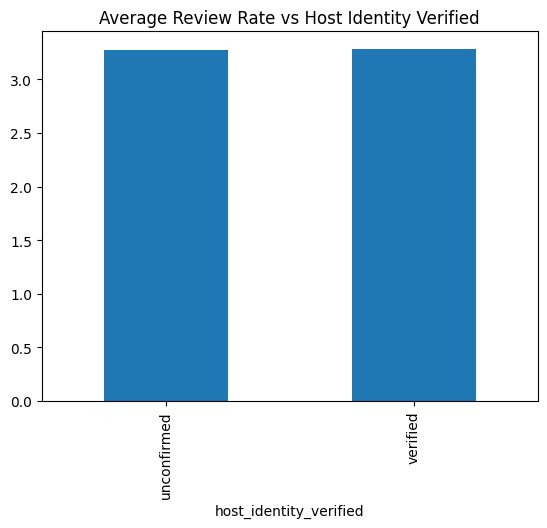


Correlation between price and service fee:
                 price_$  service_fee_$
price_$        1.000000       0.999991
service_fee_$  0.999991       1.000000


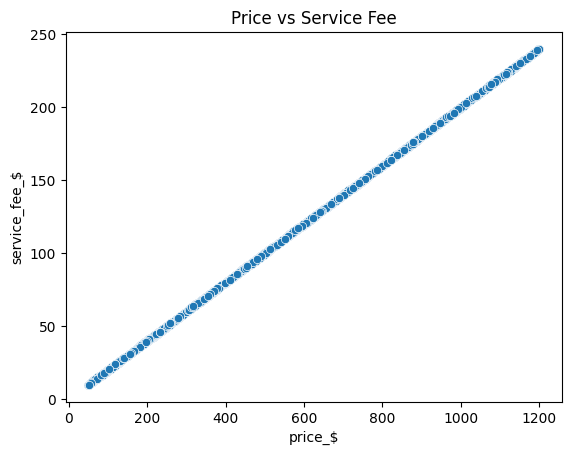

In [15]:
# 1️ Upload Excel file
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get uploaded filename
filename = list(uploaded.keys())[0]

# 2️ Load Excel file
df = pd.read_excel(filename)

# 3️ Clean column names
df.columns = df.columns.str.strip()

# 4️ Drop duplicates and unnecessary columns safely
df.drop_duplicates(inplace=True)
df.drop(['house_rules','license'], axis=1, inplace=True, errors='ignore')

# 5️ Clean 'price' and 'service fee' columns
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False)
        df[col] = df[col].str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 6️ Rename columns
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$',
    'room type': 'room_type',
    'host name': 'host_name',
    'host id': 'host_id',
    'neighbourhood group': 'neighbourhood_group',
    'number of reviews': 'number_of_reviews',
    'review rate number': 'review_rate_number',
    'availability 365': 'availability_365',
    'calculated host listings count': 'calculated_host_listings_count',
    'Construction year': 'construction_year'
}, inplace=True)

# 7️ Drop missing values
df.dropna(inplace=True)

# 8️ Convert data types
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['construction_year'] = df['construction_year'].astype(int)

# 9️ Fix typos in neighborhood names
df.loc[df['neighbourhood_group'].str.lower() == 'brookin', 'neighbourhood_group'] = 'Brooklyn'

# 10️ Remove outliers
df = df[df['availability_365'] <= 500]

# 11️ Exploratory Analysis & Questions

# Q1: Different property types
print("Different room types:", df['room_type'].unique())

# Q2: Neighborhood group with highest number of listings
neighbourhood_counts = df['neighbourhood_group'].value_counts()
print("\nNumber of listings per neighbourhood group:\n", neighbourhood_counts)

# Plot
sns.countplot(data=df, x='neighbourhood_group')
plt.title("Number of Listings per Neighbourhood Group")
plt.show()

# Q3: Neighborhood group with highest average price
avg_price = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending=False)
print("\nAverage price per neighbourhood group:\n", avg_price)

# Plot
avg_price.plot(kind='bar', title="Average Price per Neighbourhood Group", ylabel="Price ($)")
plt.show()

# Q4: Relationship between construction year and price
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='construction_year', y='price_$')
plt.title("Price vs Construction Year")
plt.show()

# Q5: Top 10 hosts by listing count
top_hosts = df.groupby('host_name')['calculated_host_listings_count'].max().sort_values(ascending=False).head(10)
print("\nTop 10 hosts by listing count:\n", top_hosts)

# Plot
top_hosts.plot(kind='bar', title="Top 10 Hosts by Listing Count")
plt.show()

# Q6: Verified identity and positive reviews
verified_reviews = df.groupby('host_identity_verified')['review_rate_number'].mean()
print("\nAverage review rate by identity verification:\n", verified_reviews)

# Plot
verified_reviews.plot(kind='bar', title="Average Review Rate vs Host Identity Verified")
plt.show()

# Q7: Correlation between price and service fee
correlation = df[['price_$','service_fee_$']].corr()
print("\nCorrelation between price and service fee:\n", correlation)

sns.scatterplot(data=df, x='price_$', y='service_fee_$')
plt.title("Price vs Service Fee")
plt.show()
